In [2]:
import numpy as np
import pandas as pd
import scipy as sp
import json
import matplotlib.pyplot as plt
import seaborn as sns
import glob
import importlib
from scipy.stats import chisquare
import load_stats as stat_reader
plt.style.use("ggplot")

In [2]:
importlib.reload(stat_reader)
# fnames_non_par = glob.glob('stats_non_parallel/*.json')
# non_par_stats = stat_reader.load_stats(fnames_non_par)

<module 'load_stats' from '/home/sesegma/Documents/uva/hep/rust_scifi/results/load_stats.py'>

In [18]:
importlib.reload(stat_reader)
# fnames_par = glob.glob('../../CA_seeding_results/default_params/stats/*.json')
fnames_par = glob.glob('../../CA_seeding_results/nodes_2_cores_14/stats/*.json')
par_stats = stat_reader.load_stats(fnames_par) 

In [19]:
perc_found_oct = sum(len(x) for x in par_stats.found_oct) / sum(len(x) for x in par_stats.true_oct)
perc_found_full = sum(len(x) for x in par_stats.found_full) / sum(len(x) for x in par_stats.true_full)
perc_ghost_full = par_stats.false_full
# perc_ghost_oct = np.mean(false_oct)
perc_ghost_full_single= (par_stats.false_full_single / sum(par_stats.size))
perc_ghost_oct = np.mean(par_stats.false_oct)
missing_el = sum(np.abs(par_stats.missing_partileIDs) == 11)
perc_missed_electrons = missing_el/len(par_stats.missing_partileIDs)
# missing_el = missing_el[missing_el == 11  missing_el == -11]
print("Found oct  keys  {:0.4f}".format(np.mean(perc_found_oct)))
print("Found full keys {:0.4f}".format(np.mean(perc_found_full)))
# print("Ghost rate oct  {:0.4f}".format(perc_ghost_oct))
print("Ghost rate full tracks {:0.4f}".format(np.mean(perc_ghost_full)))
print("Ghost rate full tracks all in one {:0.4f}".format(perc_ghost_full_single))
# print("Percentage of electrons in missing keys {:0.4f}".format(perc_missed_electrons))

Found oct  keys  0.7792
Found full keys 0.7069
Ghost rate full tracks 0.0842
Ghost rate full tracks all in one 0.1080


In [20]:
all_octs = par_stats.oct_chi2_x.size + par_stats.oct_true_chi2_x.size
print(all_octs)
print(par_stats.oct_chi2_x.size/all_octs)
print(par_stats.oct_true_chi2_x.size/all_octs)


4580798
0.9675672230035028
0.03243277699649712


In [21]:
# sns.distplot(np.abs(par_stats.omega), norm_hist=True, kde=False)
sns.distplot(tot_p*1e-9, norm_hist=True, kde=False)
plt.xlim([0, 3e-5])
# sns.distplot(px)

NameError: name 'tot_p' is not defined

Text(0, 0.5, '$p_x$')

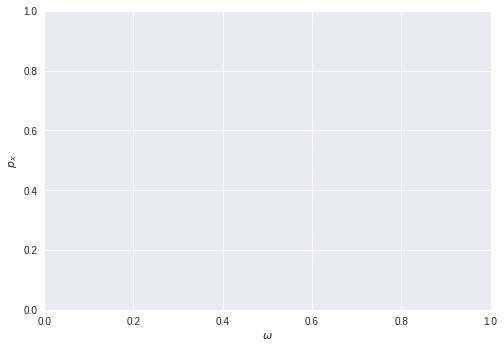

In [68]:
tot_p = np.array([np.sqrt(x**2 + y**2 + z**2) for x,y,z in par_stats.true_momentum])
px = np.array([x for x,_,_ in par_stats.true_momentum])
# plt.scatter(1/(par_stats.omega), tot_p, alpha=0.3)
plt.xlabel('$\omega$')
plt.ylabel('$p_x$')
# plt.yscale('log')
# plt.xscale('log')
# plt.ylim([1e-5,1e-1])

In [569]:
sns.distplot(par_stats.)

In [393]:
plt.scatter( par_stats.ft_size, par_stats.ghost_full)
# plt.yscale('log')
# plt.ylim(1,)

In [196]:
# plt.scatter(non_par_stats.ft_size,non_par_stats.quad1_time)
# plt.scatter(non_par_stats.ft_size,non_par_stats.quad2_time)
# plt.scatter(non_par_stats.ft_size,non_par_stats.quad3_time)
plt.scatter(np.array(non_par_stats.ft_size),non_par_stats.oct_time)
plt.scatter(np.array(non_par_stats.ft_size),non_par_stats.full_track_time)
# plt.scatter(non_par_stats.ft_size,non_par_stats.time)
plt.ylim([1e-5,1e5])
plt.yscale('log')

NameError: name 'non_par_stats' is not defined

0.08972046805188544 0.07821799163298097 0.07971846875082003 0.28577465483850994 0.4624550253530849
0.09605168635522908 0.08149154482058653 0.08497423620491505 0.12585852146062362 0.2581596244446022


Text(0.5, 1.0, '1 core')

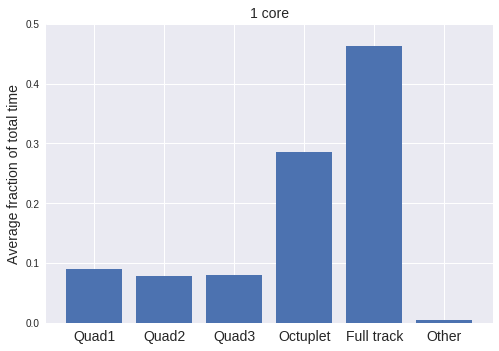

In [10]:
plt.style.use('seaborn')
q1 = np.array(non_par_stats.quad1_time)/ np.array(non_par_stats.time)
q2 = np.array(non_par_stats.quad2_time)/ np.array(non_par_stats.time)
q3 = np.array(non_par_stats.quad3_time)/ np.array(non_par_stats.time)
oct_frac = np.array(non_par_stats.oct_time)/ np.array(non_par_stats.time)
full_track_frac = np.array(non_par_stats.full_track_time)/ np.array(non_par_stats.time)
seq_time = (np.array(non_par_stats.time) - np.array(non_par_stats.quad1_time) -  np.array(non_par_stats.quad2_time)\
                  - np.array(non_par_stats.quad3_time) - np.array(non_par_stats.oct_time) - np.array(non_par_stats.full_track_time))

sequential_frac = seq_time/ np.array(non_par_stats.time)
print(np.mean(q1),np.mean(q2),np.mean(q3),np.mean(oct_frac), np.mean(full_track_frac))
print(np.std(q1),np.std(q2),np.std(q3),np.std(oct_frac), np.std(full_track_frac))
y_axis = ["Quad1", "Quad2", "Quad3", "Octuplet", "Full track", "Other"]
plt.bar(y_axis,\
        (np.mean(q1),np.mean(q2),np.mean(q3),np.mean(oct_frac), np.mean(full_track_frac), np.mean(sequential_frac)))
# plt.xlabel('Algorithm stages', fontsize=12)
plt.ylim([0,0.5])
plt.xticks(fontsize=14)
plt.ylabel('Average fraction of total time', fontsize=14)
plt.title("1 core", fontsize=14)
# plt.savefig('figures/time_fractions_non_par.pdf', bbox_inches='tight')

In [73]:
plt.style.use('seaborn')
q1 = np.array(par_stats.quad1_time)/ np.array(par_stats.time)
q2 = np.array(par_stats.quad2_time)/ np.array(par_stats.time)
q3 = np.array(par_stats.quad3_time)/ np.array(par_stats.time)
oct_frac = np.array(par_stats.oct_time)/ np.array(par_stats.time)
full_track_frac = np.array(par_stats.full_track_time)/ np.array(par_stats.time)
seq_time = (np.array(par_stats.time) - np.array(par_stats.quad1_time) -  np.array(par_stats.quad2_time)\
                  - np.array(par_stats.quad3_time) - np.array(par_stats.oct_time) - np.array(par_stats.full_track_time))

sequential_frac = seq_time/ np.array(par_stats.time)
print(np.mean(q1),np.mean(q2),np.mean(q3),np.mean(oct_frac), np.mean(full_track_frac))
print(np.std(q1),np.std(q2),np.std(q3),np.std(oct_frac), np.std(full_track_frac))
y_axis = ["Quad1", "Quad2", "Quad3", "Octuplet", "Full track", "Other"]
plt.bar(y_axis,\
        (np.mean(q1),np.mean(q2),np.mean(q3),np.mean(oct_frac), np.mean(full_track_frac), np.mean(sequential_frac)))
plt.ylim([0,0.5])
# plt.xlabel('Algorithm stages', fontsize=12)
plt.xticks(fontsize=14)
plt.ylabel('Average fraction of total time', fontsize=14)
plt.title("24 cores", fontsize=14)
# plt.savefig('figures/time_fractions_par.pdf', bbox_inches='tight')

0.13197680470827458 0.11132323735127524 0.11452203583493491 0.2944122389241708 0.32788162715886304
0.10747582367320699 0.08520053719320306 0.08759914400963315 0.12457775264404335 0.23345371372177454


Text(0.5, 1.0, '24 cores')

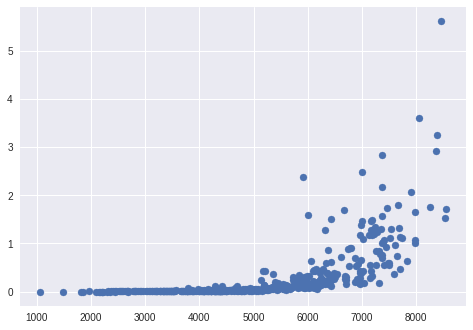

In [74]:
plt.scatter(par_stats.ft_size,par_stats.time)

In [180]:
import scipy
x_arr = np.linspace(1e3,1e4)
def func(x, a, b):
    return a * np.exp(b * x)
plt.scatter(par_stats.ft_size,par_stats.size, marker = 'o',c='steelblue',\
            edgecolors='navy',label=r'Full tracks',alpha=0.6)
popt, pcov = scipy.optimize.curve_fit(func, par_stats.ft_size, par_stats.size, p0=(9, 1e-3))
plt.plot(x_arr, func(x_arr, *popt), 'k-', label=r'${:.2f}\, e^{{{:.2e}}}$'.format(*popt))
# plt.plot(x_sorted, 9*np.exp(0.00045*x_sorted))
plt.yscale('log')
plt.ticklabel_format(axis='x',style='sci',scilimits=(3,3), useMathText=True)
plt.tick_params(axis='both', which='major', labelsize=14)
plt.xlabel('No. hits in event', fontsize=16)
plt.ylabel('No. full tracks', fontsize=14)
plt.legend(fontsize=16)
plt.savefig('figures/ft_size_vs_num_tracks_log.pdf', bbox_inches='tight')
print("Mean size of all full tracks {:0.3f}".format(np.mean(par_stats.size)))
print("Median in size of all full tracks {:0.3f}".format(np.median(par_stats.size)))
print("Std in size of all full tracks {:0.3f}".format(np.std(par_stats.size)))

Mean size of all full tracks 80.374
Median in size of all full tracks 77.000
Std in size of all full tracks 33.796


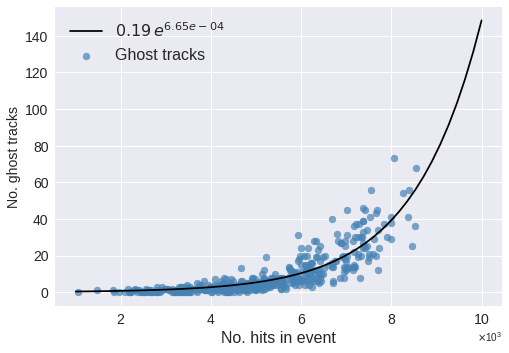

In [184]:
def func(x, a, b):
    return a * np.exp(b * x)
plt.style.use('seaborn')
plt.scatter(par_stats.ft_size,par_stats.ghost_full,marker='o', label='Ghost tracks', c='steelblue', alpha=0.7)
popt, pcov = scipy.optimize.curve_fit(func, par_stats.ft_size, par_stats.ghost_full, p0=(9, 1e-3))
plt.plot(x_arr, func(x_arr, *popt),'k-', label=r'${:.2f}\, e^{{{:.2e}}}$'.format(*popt))
# plt.xscale('log')
# plt.yscale('log')
plt.ticklabel_format(axis='x',style='sci',scilimits=(3,3), useMathText=True)
plt.xlabel('No. hits in event', fontsize=16)
plt.ylabel('No. ghost tracks', fontsize=14)
plt.legend(fontsize=16)
plt.tick_params(axis='both', which='major', labelsize=14)
plt.savefig('figures/ft_size_vs_num_ghosts.pdf', bbox_inches='tight')


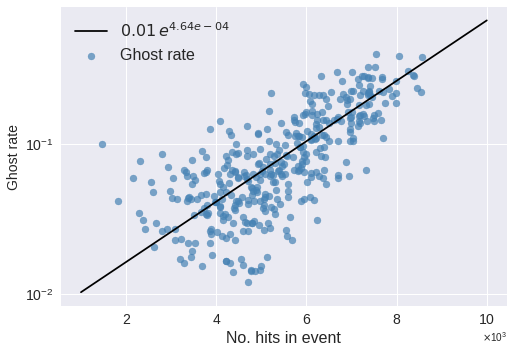

In [77]:
def func(x, a, b):
    return a * np.exp(b * x)
plt.style.use('seaborn')
plt.scatter(par_stats.ft_size,par_stats.false_full,marker='o', label='Ghost rate', c='steelblue', alpha=0.7)
popt, pcov = scipy.optimize.curve_fit(func, par_stats.ft_size, par_stats.false_full, p0=(9, 1e-3))
plt.plot(x_arr, func(x_arr, *popt),'k-', label=r'${:.2f}\, e^{{{:.2e}}}$'.format(*popt))
# plt.xscale('log')
plt.yscale('log')
plt.ticklabel_format(axis='x',style='sci',scilimits=(3,3), useMathText=True)
plt.xlabel('No. hits in event', fontsize=16)
plt.ylabel('Ghost rate', fontsize=14)
plt.legend(fontsize=16)
plt.tick_params(axis='both', which='major', labelsize=14)
# plt.savefig('figures/ft_size_vs_ghost_rate_log.pdf', bbox_inches='tight')


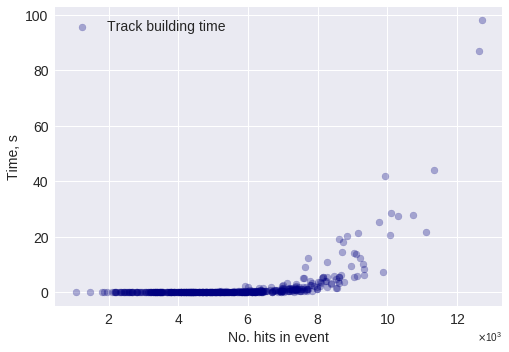

In [174]:
def func(x, a, b):
    return a * np.exp(b * x)
x_arr = np.linspace(1e3,13000)
popt, pcov = sp.optimize.curve_fit(func, par_stats.ft_size, par_stats.time, p0=(0.4, 0.002))
plt.scatter(par_stats.ft_size, par_stats.time,c='navy', label='Track building time', alpha=0.3)
# plt.plot(x_arr, func(x_arr, *popt), c='k', label=r'${:.2e}\, e^{{{:.2e}}}$'.format(*popt))
plt.xlabel("No. hits in event", fontsize=14)
plt.ylabel("Time, s", fontsize=14)
# plt.xscale('log')
# plt.yscale('log')
# plt.ylim(1e-3,)
plt.legend(fontsize=14)
plt.ticklabel_format(axis='x',style='sci',scilimits=(3,3), useMathText=True)
plt.tick_params(axis='both', which='major', labelsize=14)
plt.savefig('figures/ft_size_vs_time_no_limits.pdf', bbox_inches='tight')

In [185]:
par_stats.ft_size.max()

8554

In [187]:
print("Average time {:.2f}".format(np.mean(par_stats.time) * 1e3))
print("Minimum time {:.2f}".format(par_stats.time.min() * 1e3))
print("Maximum time {:.2f}".format(par_stats.time.max() * 1e3 )) 

Average time 219.87
Minimum time 1.73
Maximum time 4059.45


In [84]:
def func(x, a, b):
    return a * np.exp(b * x)  
popt_non_par, pcov_non_par = scipy.optimize.curve_fit(func, non_par_stats.ft_size, non_par_stats.time, p0=(0.0004, 0.0015))
popt_par, pcov_par = scipy.optimize.curve_fit(func, par_stats.ft_size, par_stats.time, p0=(1e-3, 1e-3))
plt.scatter(non_par_stats.ft_size, non_par_stats.time, label='Sequential alogrithm', alpha=0.7)
plt.scatter(par_stats.ft_size, par_stats.time, label='Parallel algorithm', alpha=0.7)
# plt.plot(np.sort(non_par_stats.ft_size), 0.0004 * np.exp(0.0015*np.sort(non_par_stats.ft_size)), c='navy',\
#          label=r'${:.4f}\, e^{{{:.3f}}}$'.format(*popt_non_par))
plt.plot(np.sort(non_par_stats.ft_size), func(np.sort(non_par_stats.ft_size), *popt_non_par), c='navy',\
         label=r'${:.4f}\, e^{{{:.3f}}}$'.format(*popt_non_par))
plt.plot(np.sort(par_stats.ft_size), func(np.sort(par_stats.ft_size), *popt_par), c='darkolivegreen',\
         label=r'${:.4f}\, e^{{{:.3f}}}$'.format(*popt_par))
plt.xlabel("No. hits in event", fontsize=14)
plt.ylabel("Time, s", fontsize=14)
# plt.ylim([1e-3, 1e3])
plt.yscale('log')
plt.legend(fontsize=14)
# plt.savefig('time_comparison.pdf', bbox_inches='tight')

RuntimeError: Optimal parameters not found: Number of calls to function has reached maxfev = 600.

In [264]:
# ft_non_par = np.array(non_par_stats.ft_size)
# ft_par = np.array(par_stats.ft_size)
# reduced_ft_non_par = ft_non_par[ft_non_par < 8000]
# reduced_time_non_par = np.array(non_par_stats.time)[ft_non_par < 8000]
# reduced_ft_par = ft_par[ft_par < 8000]
# reduced_time_par = np.array(par_stats.time)[ft_par < 8000]
def func(x, a, b):
    return a * np.exp(b * x)  
popt_non_par, pcov_non_par = scipy.optimize.curve_fit(func, non_par_stats.ft_size, non_par_stats.time, p0=(0.0004, 0.0015))
popt_par, pcov_par = scipy.optimize.curve_fit(func, par_stats.ft_size, par_stats.time, p0=(1e-3, 1e-3))
plt.scatter(non_par_stats.ft_size, non_par_stats.time, label='Sequential alogrithm', alpha=0.7)
plt.scatter(par_stats.ft_size, par_stats.time, label='Parallel algorithm', alpha=0.7)
# plt.plot(np.sort(non_par_stats.ft_size), 0.0004 * np.exp(0.0015*np.sort(non_par_stats.ft_size)), c='navy',\
#          label=r'${:.4f}\, e^{{{:.3f}}}$'.format(*popt_non_par))
# plt.plot(np.sort(non_par_stats.ft_size), func(np.sort(non_par_stats.ft_size), *popt_non_par), c='navy',\
#          label=r'${:.4f}\, e^{{{:.3f}}}$'.format(*popt_non_par))
# plt.plot(np.sort(par_stats.ft_size), func(np.sort(par_stats.ft_size), *popt_par), c='darkolivegreen',\
#          label=r'${:.4f}\, e^{{{:.3f}}}$'.format(*popt_par))
plt.xlabel("No. hits in event", fontsize=14)
plt.ylabel("Time, s", fontsize=14)
# plt.ylim([1e-3, 1e3])
plt.yscale('log')
plt.legend(fontsize=14)
# plt.savefig('time_comparison.pdf', bbox_inches='tight')

NameError: name 'non_par_stats' is not defined

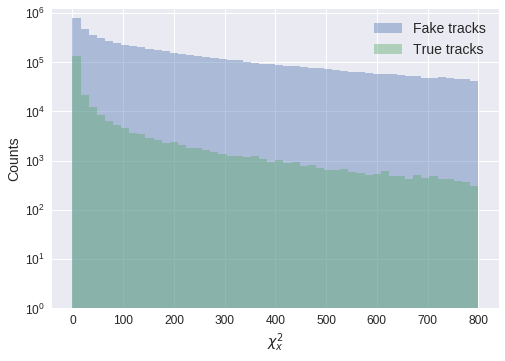

In [27]:
ax1 = sns.distplot(par_stats.oct_chi2_x, kde=False, norm_hist=False, label="Fake tracks")
ax1 = sns.distplot(par_stats.oct_true_chi2_x, kde=False, norm_hist=False, label="True tracks")
ax1.set_yscale('log')
ax1.legend(fontsize=14)
ax1.set_ylim(1,)
ax1.set_xlabel('$\chi^2_x$', fontsize=14)
ax1.set_ylabel('Counts', fontsize=14)
ax1.tick_params(axis='both', which='major', labelsize=12)
par_stats.oct_true_chi2_x = np.array(par_stats.oct_true_chi2_x)
plt.savefig('figures/chi2_x_oct.pdf', bbox_inches = 'tight')
# len(non_par_stats.oct_true_chi2_x[oct_true_chi2_x < 700]) / len(non_par_stats.oct_true_chi2_x)

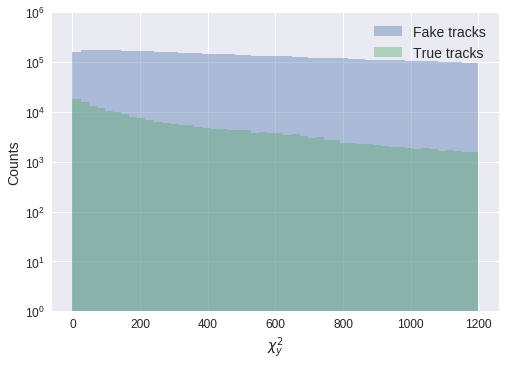

In [24]:
plt.style.use('seaborn')
ax1 = sns.distplot(par_stats.oct_chi2_y, kde=False, norm_hist=False, label='Fake tracks')
ax1 = sns.distplot(par_stats.oct_true_chi2_y, kde=False, norm_hist=False, label='True tracks')
# par_stats.oct_true_chi2_y = np.array(par_stats.oct_true_chi2_y)
# len(par_stats.oct_true_chi2_y[par_stats.oct_true_chi2_y < 4000]) / len(par_stats.oct_true_chi2_y)
ax1.set_yscale('log')
ax1.set_ylim([1, 1e6])
ax1.set_xlabel('$\chi^2_y$', fontsize=14)
ax1.set_ylabel('Counts', fontsize=14)
ax1.tick_params(axis='both', which='major', labelsize=12)
ax1.legend(fontsize=14)
plt.savefig('figures/chi2_y_oct.pdf', bbox_inches = 'tight')

5.2190704
-5.907791
0.0
0.0009779762036226443
0.1479001591258562


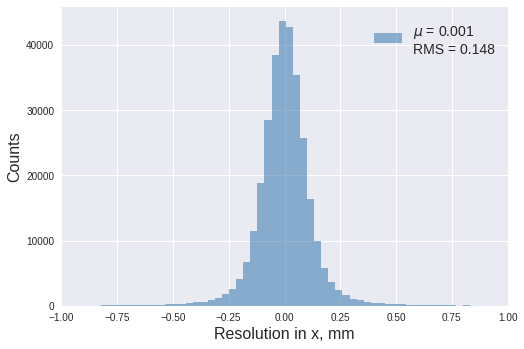

In [86]:
plt.style.use('seaborn')
resolution_div = np.array(par_stats.resolution_x)
print(max(resolution_div))
print(min(resolution_div))
resolution_threshold = 10
print(len(resolution_div[(np.abs(resolution_div) > resolution_threshold)])/ len(resolution_div))
resolution_div = resolution_div[(np.abs(resolution_div) <= resolution_threshold)]
plt.hist(resolution_div, bins=350,color='steelblue',alpha=0.6,\
        label=f"$\mu$ = {np.mean(par_stats.resolution_x):.3f}\nRMS = {np.std(par_stats.resolution_x):.3f}")
plt.xlim([-1,1])
plt.xlabel('Resolution in x, mm', fontsize=16)
plt.ylabel('Counts', fontsize=16)
plt.legend(fontsize=14, loc='upper right')
# plt.annotate(f"$\mu$ = {np.mean(par_stats.resolution_x):.3f}\n$\sigma$ = {np.std(par_stats.resolution_x):.3f}",\
#              (0.8,0.8), xycoords='figure fraction', fontsize=16)
# plt.savefig('figures/resolution_x.pdf', bbox_inches='tight')
print(np.mean(resolution_div))
print(np.std(resolution_div))


In [22]:
np.sqrt(np.sum(np.array(par_stats.pull_x)**2) / len(par_stats.pull_x))

1.6129774920454418

0.0036544330117541817 0.02276526352203394 0.4485404838224456 1.1558164818767525 0.736085661334178 0.2285784199314711
99.96260592696058
55.11963 -52.69043


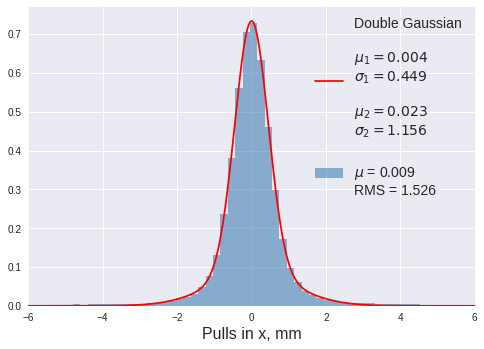

In [40]:
def two_norm(x, *args):
    m1, m2, s1, s2, k1, k2 = args
    ret = k1*sp.stats.norm.pdf(x, loc=m1 ,scale=s1)
    ret += k2*sp.stats.norm.pdf(x, loc=m2 ,scale=s2)
    return ret

x_axis = np.arange(-6, 6, 0.001)
pulls_div = np.array(par_stats.pull_x)
pull_threshold = 20
pulls_remove_outliers = pulls_div[(np.abs(pulls_div) <= pull_threshold)]
ax = plt.hist(pulls_remove_outliers, density=True, bins=200, color='steelblue',alpha=0.6, \
              label=f'\n$\mu$ = {np.mean(pulls_remove_outliers):.3f}\nRMS = {np.std(pulls_remove_outliers):.3f}')
params = [0, 0, 1, 1, 1, 1]
# params = [0, 1, 1]
center_bins = (np.array(ax[1][1:])+np.array(ax[1][:-1]))/2
popt, pcov = sp.optimize.curve_fit(two_norm,center_bins, ax[0], p0=params)
print(*popt)
plt.xlabel('Pulls in x, mm', fontsize=16)
plt.xlim([-6,6])
plt.plot(x_axis, two_norm(x_axis, *popt),'r-', \
         label=f'Double Gaussian\n\n$\mu_1={popt[0]:.3f}$\n$\sigma_1={popt[2]:.3f}$\n\n$\mu_2={popt[1]:.3f}$\n$\sigma_2={popt[3]:.3f}$')
# plt.annotate(f'$\mu$ = {np.mean(pulls_remove_outliers):.3f}\n$\sigma$ = {np.std(pulls_remove_outliers):.3f}',\
#             (0.8,0.8), xycoords='figure fraction', fontsize=14)
leg=plt.legend(fontsize=14, loc='upper right', frameon=False)
leg.get_frame().set_edgecolor('b')
# plt.annotate(f'$\mu_1$ = {popt[0]:.3f}\n$\sigma_1 = {popt[2]:.3f}$', (0.75,0.8), \
#              xycoords='figure fraction', fontsize=14)
# plt.annotate(f'$\mu_2$ = {popt[1]:.3f}\n$\sigma_2 = {popt[3]:.3f}$', (0.75,0.6), \
#              xycoords='figure fraction', fontsize=14)
# plt.savefig('figures/pull_x.pdf', bbox_inches='tight')
print(len(pulls_remove_outliers)/ len(pulls_div) *100)
print(max(par_stats.pull_x), min(par_stats.pull_x))

In [24]:
popt[2]**2 + popt[3]**2

1.5371003054056267

23.3308 -22.603638


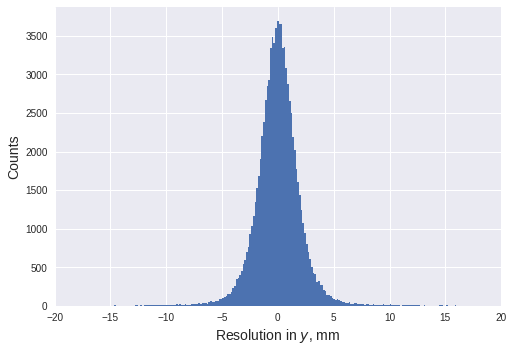

In [45]:
plt.style.use('seaborn')
plt.hist(par_stats.resolution_y, bins=300)
plt.xlim([-20,20])
plt.xlabel('Resolution in $y$, mm', fontsize=14)
plt.ylabel('Counts', fontsize=14)
print(np.max(par_stats.resolution_y), np.min(par_stats.resolution_y))


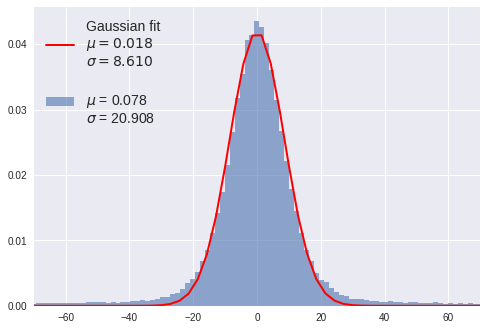

325.9752 -452.07275


In [39]:
# mu, std = norm.fit(par_stats.pull_y)
def one_norm(x, *args):
    m1,  s1,  k1 = args
    ret = k1*sp.stats.norm.pdf(x, loc=m1 ,scale=s1)
    return ret
x_limits = [-70, 70]
x_arr = np.linspace(x_limits[0], x_limits[1])
# p = norm.pdf(x_arr, mu, std)
ax=plt.hist(par_stats.pull_y, bins=500, density=True, alpha=0.6,\
              label=f'\n$\mu$ = {np.mean(par_stats.pull_y):.3f}\n$\sigma$ = {np.std(par_stats.pull_y):.3f}')
center_bins = (np.array(ax[1][1:])+np.array(ax[1][:-1]))/2
popt, pcov = sp.optimize.curve_fit(one_norm,center_bins, ax[0], p0=[0,1,1])
plt.plot(x_arr, one_norm(x_arr, *popt),'r-', linewidth=2, label=f'Gaussian fit\n$\mu={popt[0]:.3f}$\n$\sigma={popt[1]:.3f}$')
plt.xlim(x_limits)
plt.legend(fontsize=14, loc='upper left')
plt.show()
print(np.max(par_stats.pull_y), np.min(par_stats.pull_y))

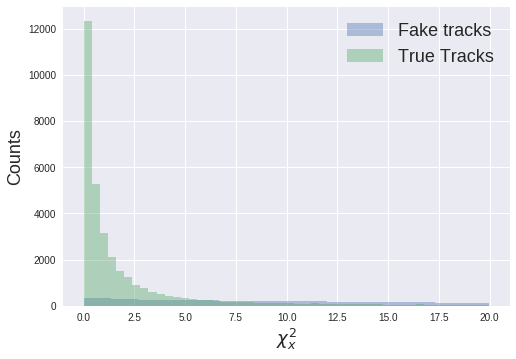

In [29]:
plt.style.use('seaborn')
ax = sns.distplot(par_stats.chi2_x, kde=False, label='Fake tracks')
ax = sns.distplot(par_stats.true_chi2_x, kde=False, label='True Tracks')
ax.set_xlabel('$\chi^2_{x}$', fontsize=18)
ax.set_ylabel('Counts', fontsize=18)
# ax.set_ylabel('Frequency')
ax.legend(fontsize=18)
plt.savefig('figures/chi2_x_full.pdf', bbox_inches='tight')

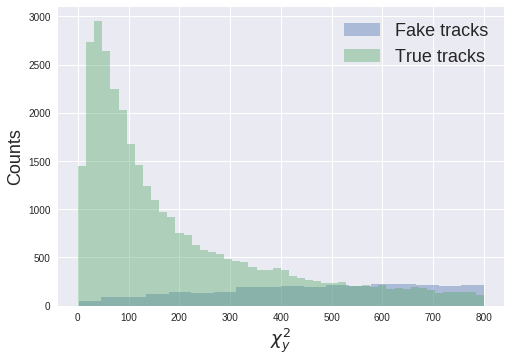

In [31]:
# sns.distplot(chi2_y, kde=False, norm_hist=False)
ax = sns.distplot(par_stats.chi2_y, kde=False, label='Fake tracks')
ax = sns.distplot(par_stats.true_chi2_y, kde=False, label='True tracks')
ax.legend(fontsize=18)
ax.set_xlabel(r'$\chi^2_{y}$', fontsize=18)
ax.set_ylabel('Counts', fontsize=18)
plt.savefig('figures/chi2_y_full.pdf', bbox_inches='tight')
# true_chi2_y = np.array(true_chi2_y)
# len(true_chi2_y[true_chi2_y < 7000]) / len(true_chi2_y)
# print(np.max(true_chi2_y))

In [94]:
found_lens = [len(s) for s in found_full_keys]
plt.scatter(found_lens,size)

NameError: name 'found_full_keys' is not defined

In [12]:
print(scaling.T.iloc[::-1].to_latex())

\begin{tabular}{lrrrrr}
\toprule
{} &            0 &            1 &            2 &            3 &            4 \\
\midrule
core32   &     0.009954 &     0.025201 &     0.121802 &     3.677466 &   138.947581 \\
core16   &     0.009081 &     0.023046 &     0.165517 &     7.124622 &   276.327175 \\
core8    &     0.005876 &     0.027671 &     0.286732 &    13.978678 &   556.583791 \\
core4    &     0.007183 &     0.051135 &     0.476168 &    27.366537 &  1107.875393 \\
core2    &     0.008524 &     0.068808 &     0.914860 &    54.386912 &  2218.529796 \\
core1    &     0.012589 &     0.124250 &     1.788067 &   107.812997 &  4373.035469 \\
size     &  1821.000000 &  3801.000000 &  5557.000000 &  7706.000000 &  9918.000000 \\
event\_no &    82.000000 &    78.000000 &    68.000000 &    38.000000 &    13.000000 \\
\bottomrule
\end{tabular}



In [14]:
scaling

event_no  size        core1        core2        core4       core8  \
0        82  1821     0.012589     0.008524     0.007183    0.005876   
1        78  3801     0.124250     0.068808     0.051135    0.027671   
2        68  5557     1.788067     0.914860     0.476168    0.286732   
3        38  7706   107.812997    54.386912    27.366537   13.978678   
4        13  9918  4373.035469  2218.529796  1107.875393  556.583791   

       core16      core32  
0    0.009081    0.009954  
1    0.023046    0.025201  
2    0.165517    0.121802  
3    7.124622    3.677466  
4  276.327175  138.947581

In [45]:
cor =4
(scaling.iloc[cor,2]/scaling.iloc[cor,2:] ) / num_nodes


core1     1.000000
core2     0.985571
core4     0.986807
core8     0.982115
core16    0.989098
core32    0.983517
Name: 4, dtype: float64

In [13]:
num_nodes = np.array([1,2,4,8,16,32])
scaling = pd.read_csv('scaling_time_data/table.csv')
sp_up = scaling.iloc[1,2] / scaling.iloc[1,2:]
# sp_up[4]/ num_nodes[4]
print(sp_up)

core1     1.000000
core2     1.805742
core4     2.429863
core8     4.490256
core16    5.391485
core32    4.930340
Name: 1, dtype: float64


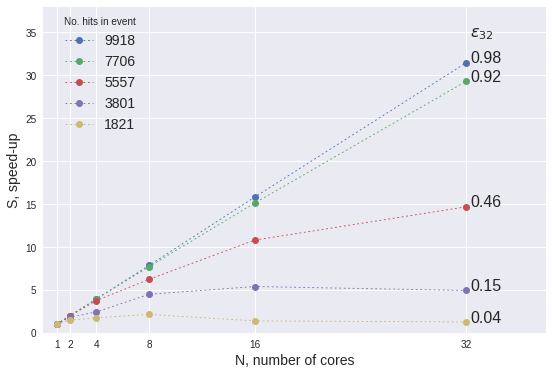

In [34]:
import scipy as sp
importlib.reload(plt)
plt.style.use('seaborn')
fig = plt.figure(figsize=(9,6))
def gustafson(n, s):
    return n + (1-n)*s
def amdahl(s):
    return 1 / ((1 - p) + p / s)
num_nodes = np.array([1,2,4,8,16,32])
# exec_time = 1e-3*np.array([155492.3240, 79559.5678, 39266.1005, 26278.9714, 19849.4842, 16136.6124,10929.1013])
# speed_up = exec_time[0] / exec_time
for number_ev,i in enumerate(reversed(range(5))):
    speed_up =  scaling.iloc[i,2] / scaling.iloc[i,2:]
    popt_g, _ = sp.optimize.curve_fit(gustafson, num_nodes, speed_up)
    plt.plot(num_nodes, speed_up, marker='o', linestyle=(0,(2,3)), linewidth=0.9,\
             label=f"{scaling['size'][i]}")
    plt.annotate(f'{speed_up[-1]/ num_nodes[-1]:.2f}', (num_nodes[-1]+0.3, speed_up[-1]), fontsize=16)
# plt.scatter(num_nodes, exec_time)
#     plt.plot(num_nodes, gustafson(num_nodes, *popt_g),linestyle='dotted', label=r"S = N + (1 - N){:.3f}".format(*popt_g))
plt.xticks(num_nodes)
plt.annotate(r"$\varepsilon_{{32}}$", (num_nodes[-1]+0.3, 34.5 ), fontsize=16)
plt.xlabel('N, number of cores', fontsize=14)
plt.ylabel('S, speed-up', fontsize=14)
plt.xlim([0,38])
plt.ylim([0,38])
plt.legend(title='No. hits in event',fontsize=14, loc=(0.03,0.6))
# plt.savefig('figures/time_scaling.pdf', bbox_inches='tight')

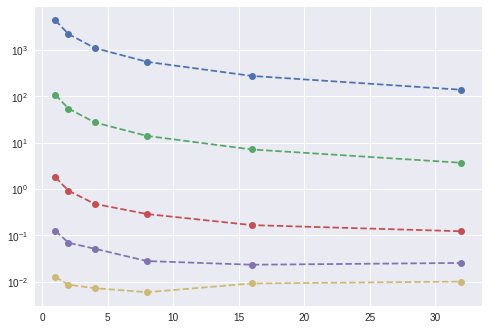

In [35]:
for i in reversed(range(5)):
    plt.plot(num_nodes, scaling.iloc[i,2:], marker="o", linestyle='--')
plt.yscale('log')
# plt.xscale('log')

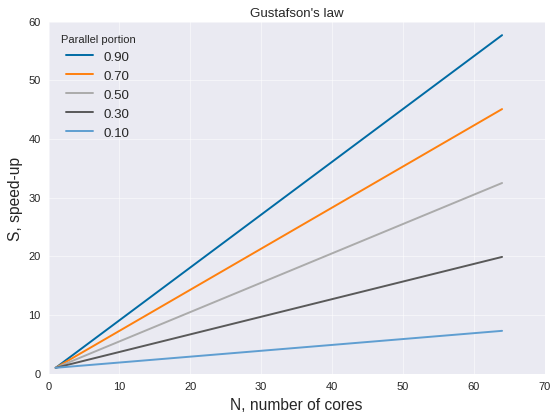

In [433]:
plt.style.use('tableau-colorblind10')
N = np.array([1,2,4,8,16,32,64])
for i in np.arange(0.1,1.0,0.2):
    plt.plot(N, N + (1 - N)*i,linestyle='-', label=r"{:.2f}".format(1-i) )
plt.legend(fontsize=12,title='Parallel portion', loc='upper left')
# plt.xlim([0,6])
plt.ylabel('S, speed-up', fontsize=14)
plt.xlabel('N, number of cores', fontsize=14)
plt.title("Gustafson's law", fontsize=12)
plt.grid(alpha=0.5)
# plt.xticks(N)
# plt.xscale('log', basex=2)
plt.savefig('figures/gustafson_law.pdf', bbox_inches='tight')

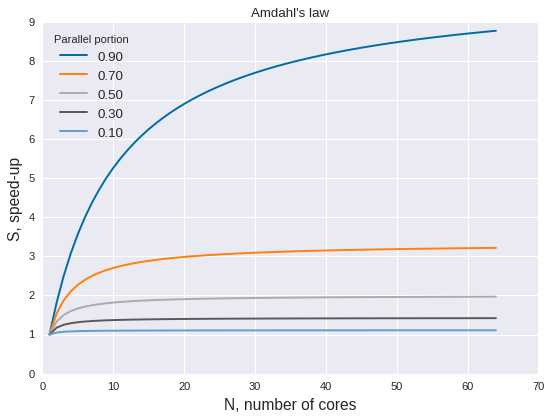

In [434]:
# from matplotlib.ticker import MaxNLocator
# plt.style.use('seaborn')
N = np.arange(1,65)
fig, ax = plt.subplots(1,1)

# plt.plot(N, N, label='Ideal case', linestyle = 'dotted')
for i in np.array([0.90, 0.70, 0.5, 0.3, 0.1]):
    ax.plot(N, 1/((1 - i) + i/N), linestyle='-', label=r"{:.2f}".format(i) )
ax.legend(fontsize=12, title='Parallel portion', loc='best')
ax.set_ylabel('S, speed-up', fontsize=14)
ax.set_xlabel('N, number of cores', fontsize=14)
ax.set_title("Amdahl's law", fontsize=12)
ax.set_ylim(0,)
# ax.set_xscale('log', basex=2)
# ax.set_xticks((1,4,16,64))
# plt.grid(alpha=0.2)
plt.savefig('figures/amdahl_law.pdf', bbox_inches='tight')

In [651]:
# plt.style.use('seaborn')
plt.style.use('tableau-colorblind10')
chi2_x_cut_1 = pd.read_csv('param_fitting_data/chi2_x_cut_1')
fig, ax1 = plt.subplots(figsize=(8,7))

# ax2 = ax1.twinx()
ax1.plot(chi2_x_cut_1.chi2_x, chi2_x_cut_1.eff_full, marker='o',c='tab:blue', \
         linewidth=0.5,linestyle=(0, (3, 10, 1, 10)),label='Efficiency')
ax1.plot(chi2_x_cut_1.chi2_x, chi2_x_cut_1.ghost_rate, marker = 'o',c='dimgray', linestyle=(0, (3, 10, 1, 10)), label='Ghost rate')

ax1.set_xlabel(r'$\chi^2_x$', fontsize=16)
ax1.set_ylabel(r'%', fontsize=16)
ax1.set_ylim([0,60])
# ax2.set_ylim([0,30])
# ax2.set_ylabel(r'%, Ghost rate', fontsize=16, color='k')
# ax1.set_yscale('log')
ax1.axvline(20, linestyle=(0, (1,4)), c='crimson')
ax1.annotate("51.13%",(21.5, 47.5) , fontsize=14)
ax1.annotate("8.40%",(21.5, 6) , fontsize=14)
ax1.annotate("Default cut",(6, 1) , fontsize=14, color='crimson')
ax1.legend(fontsize=16, loc='center right')
plt.savefig('figures/chi2_x_eff_cuts.pdf', bbox_inches='tight')
# ax2.legend(fontsize=16, loc='lower right')
# ax1.set_ylabel(r'$\varepsilon$')
# ax2.set_ylabel('Ghost rate')
# plt.gca().invert_xaxis()


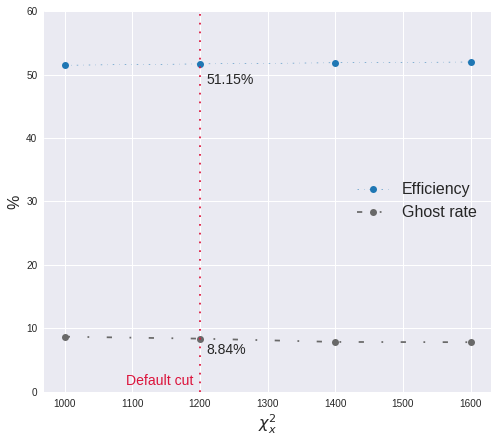

In [330]:

plt.style.use('tableau-colorblind10')
chi2_x_cut_23 =pd.read_csv('param_fitting_data/chi2_x_cut_23')
fig, ax1 = plt.subplots(figsize=(8,7))

ax1.plot(chi2_x_cut_23.chi2_x, chi2_x_cut_23.eff_full, marker='o',c='tab:blue', \
         linewidth=0.5,linestyle=(0, (3, 10, 1, 10)),label='Efficiency')
ax1.plot(chi2_x_cut_23.chi2_x, chi2_x_cut_23.ghost_rate, marker = 'o',c='dimgray', linestyle=(0, (3, 10, 1, 10)), label='Ghost rate')

ax1.set_xlabel(r'$\chi^2_x$', fontsize=16)
ax1.set_ylabel(r'%', fontsize=16)
ax1.set_ylim([0,60])
ax1.axvline(1200, linestyle=(0, (1,4)), c='crimson')
ax1.annotate("51.15%",(1210, 48.5) , fontsize=14)
ax1.annotate("8.84%",(1210, 6) , fontsize=14)
ax1.annotate("Default cut",(1090, 1) , fontsize=14, color='crimson')
ax1.legend(fontsize=16, loc='center right')

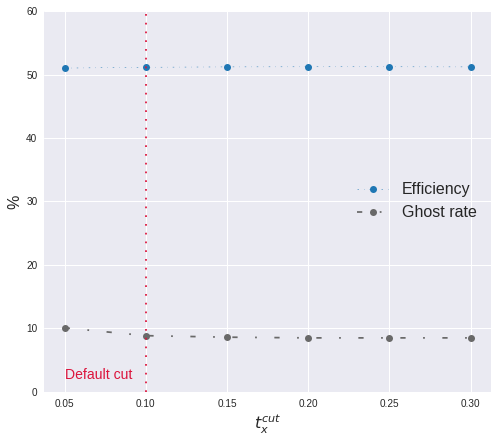

In [303]:
tx_cut = pd.read_csv('param_fitting_data/tx_cut')
fig, ax1 = plt.subplots(figsize=(8,7))

# ax2 = ax1.twinx()
ax1.plot(tx_cut.tx_cut, tx_cut.eff_full, marker='o',c='tab:blue', \
         linewidth=0.5,linestyle=(0, (3, 10, 1, 10)),label='Efficiency')
ax1.plot(tx_cut.tx_cut, tx_cut.ghost_rate, marker = 'o',c='dimgray', linestyle=(0, (3, 10, 1, 10)), label='Ghost rate')

ax1.set_xlabel(r'$t_x^{cut}$', fontsize=16)
ax1.set_ylabel(r'%', fontsize=16)
ax1.set_ylim([0,60])
# ax1.set_yscale('log')
ax1.axvline(0.1, linestyle=(0, (1,4)), c='crimson')
# ax1.annotate("51.15%",(21.5, 47.5) , fontsize=14)
# ax1.annotate("8.84%",(21.5, 6) , fontsize=14)
ax1.annotate("Default cut",(0.05, 2) , fontsize=14, color='crimson')
ax1.legend(fontsize=16, loc='center right')
plt.savefig('figures/tx_eff_cuts.pdf', bbox_inches='tight')

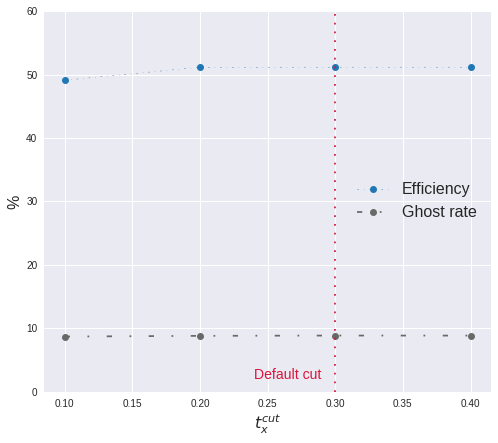

In [312]:
ty_cut = pd.read_csv('param_fitting_data/ty_cut')
fig, ax1 = plt.subplots(figsize=(8,7))

# ax2 = ax1.twinx()
ax1.plot(ty_cut.ty_cut, ty_cut.eff_full, marker='o',c='tab:blue', \
         linewidth=0.5,linestyle=(0, (3, 10, 1, 10)),label='Efficiency')
ax1.plot(ty_cut.ty_cut, ty_cut.ghost_rate, marker = 'o',c='dimgray', linestyle=(0, (3, 10, 1, 10)), label='Ghost rate')

ax1.set_xlabel(r'$t_y^{cut}$', fontsize=16)
ax1.set_ylabel(r'%', fontsize=16)
ax1.set_ylim([0,60])
# ax1.set_yscale('log')
ax1.axvline(0.3, linestyle=(0, (1,4)), c='crimson')
# ax1.annotate("51.15%",(21.5, 47.5) , fontsize=14)
# ax1.annotate("8.84%",(21.5, 6) , fontsize=14)
ax1.annotate("Default cut",(0.24, 2) , fontsize=14, color='crimson')
ax1.legend(fontsize=16, loc='center right')
# plt.savefig('figures/ty_eff_cuts.pdf', bbox_inches='tight')

In [ ]:
tx_cut = pd.read_csv('param_fitting_data/tx_cut')
fig, ax1 = plt.subplots(figsize=(8,7))

# ax2 = ax1.twinx()
ax1.plot(tx_cut.tx_cut, tx_cut.eff_full, marker='o',c='tab:blue', \
         linewidth=0.5,linestyle=(0, (3, 10, 1, 10)),label='Efficiency')
ax1.plot(tx_cut.tx_cut, tx_cut.ghost_rate, marker = 'o',c='dimgray', linestyle=(0, (3, 10, 1, 10)), label='Ghost rate')

ax1.set_xlabel(r'$t_x^{cut}$', fontsize=16)
ax1.set_ylabel(r'%', fontsize=16)
ax1.set_ylim([0,60])
# ax1.set_yscale('log')
ax1.axvline(0.1, linestyle=(0, (1,4)), c='crimson')
# ax1.annotate("51.15%",(21.5, 47.5) , fontsize=14)
# ax1.annotate("8.84%",(21.5, 6) , fontsize=14)
ax1.annotate("Default cut",(0.05, 2) , fontsize=14, color='crimson')
ax1.legend(fontsize=16, loc='center right')
plt.savefig('figures/tx_eff_cuts.pdf', bbox_inches='tight')

In [389]:
precision = 64
q_size = 10*precision
o_size = q_size * 2 + precision*7
f_size = 3* q_size + 7 * precision
print(q_size, o_size, f_size)

640 1728 2368


In [390]:
f_size * 80000 / 1000000

189.44